# Exercício

1. Utilize a base College.csv  
2. Separe 5 colunas de características( Ao menos uma categorica) e uma coluna alvo
3. Separe uma coluna alvo ( objetivo da predição)
4. Transforme os valores categoricos para números
5. Escolha para a base de treino 85% (tanto para colunas características quanto para colunas alvo) e o restante para teste
6. Verifique se a quantidade de valores nas colunas categoricas estão balanceados nas bases de treino e teste
7. Altere a escala das colunas usando StandardScaler

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'dataset/College.csv'

In [15]:
# bibliotecas de machine learning

#Scikit- Learn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import Normalizer

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

In [7]:
data = pd.read_csv(url)
display(data.sample(5).T)
data.info()

,545,59,613,740,480
Unnamed: 0,St. John's College,Boston University,University of Dayton,West Virginia Wesleyan College,Rollins College
Private,Yes,Yes,Yes,Yes,Yes
Apps,323,20192,6361,1566,1777
Accept,278,13007,5293,1400,1151
Enroll,122,3810,1507,483,382
Top10perc,31,45,26,28,31
Top25perc,51,80,51,55,55
F.Undergrad,393,14971,5889,1509,1668
P.Undergrad,4,3113,665,170,1052
Outstate,16150,18420,11380,14200,16425


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.5+ KB


* Private : Public/private indicator
* Apps : Number of applications received
* Accept : Number of applicants accepted
* Enroll : Number of new students enrolled
* Top10perc : New students from top 10% of high school class
* Top25perc : New students from top 25% of high school class
* F.Undergrad : Number of full-time undergraduates
* P.Undergrad : Number of part-time undergraduates
* Outstate : Out-of-state tuition
* Room.Board : Room and board costs
* Books : Estimated book costs
* Personal : Estimated personal spending
* PhD : Percent of faculty with Ph.D.’s
* Terminal : Percent of faculty with terminal degree
* S.F.Ratio : Student/faculty ratio
* perc.alumni : Percent of alumni who donate
* Expend : Instructional expenditure per student
* Grad.Rate : Graduation rate

### Separe 5 colunas de características (ao menos uma categorica)

In [12]:
data['Enroll.perc'] = data.Enroll / data.Apps

In [21]:
X_cols = ['Private', 'Enroll.perc', 'PhD', 'Expend', 'Apps']
X = data[X_cols]

### Separe uma coluna alvo ( objetivo da predição)

In [22]:
y_cols = ['Top10perc']
y = data[y_cols]

### Transforme os valores categoricos para números

In [28]:
encoder = LabelEncoder()
X['Private'] = encoder.fit_transform(data.Private)
display(X.sample(5))

C:\Users\lazaropd\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Private,Enroll.perc,PhD,Expend,Apps
179,1,0.360262,60,8135,458
532,1,0.501299,63,8219,385
506,1,0.245399,46,8946,489
109,1,0.368421,71,7729,342
118,0,0.285307,82,7597,8065


### Escolha para a base de treino 85% (tanto para colunas características quanto para colunas alvo) e o restante para teste

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
print("X ",X_train.shape, X_test.shape, " y ", y_train.shape, y_test.shape)

X  (660, 5) (117, 5)  y  (660, 1) (117, 1)


### Verifique se a quantidade de valores nas colunas categoricas estão balanceados nas bases de treino e teste

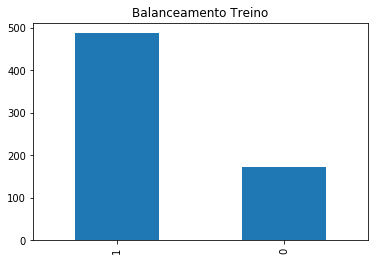

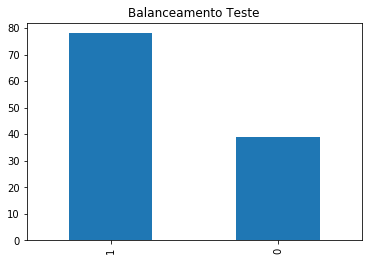

In [27]:
X_train['Private'].value_counts().plot(kind='bar')
plt.title('Balanceamento Treino')
plt.show()

X_test['Private'].value_counts().plot(kind='bar')
plt.title('Balanceamento Teste')
plt.show()

# dados desbalanceados, antes de aplicar o treinamento, fazer um balanceamento, 
#   por exemplo, com um sampling dos dados na categoria mais volumosa

### Altere a escala das colunas usando StandardScaler

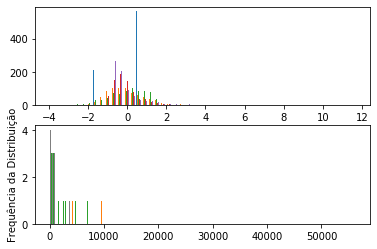

In [31]:
scaler = StandardScaler()
rescaledX = scaler.fit_transform(X)

fig, ax_lst = plt.subplots(2, 1)
plt.ylabel('Frequência da Distribuição')
ax_lst[0].hist(rescaledX[1:], 50)
ax_lst[1].hist(X_train[1:], 50)
plt.show()